In [1]:
#Declare all the libaries

import imageio.v2
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import erfc

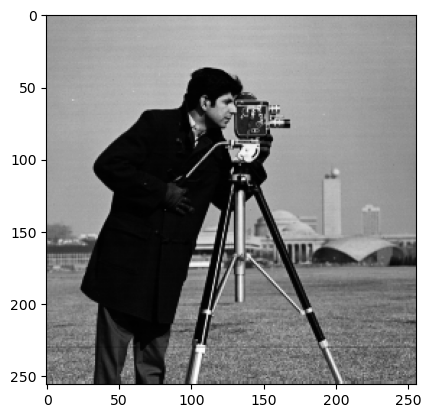

In [2]:
#Read an image and converts into an 2D array of 256*256 with value ranging from grayscale(0-255)

img = imageio.v2.imread("cameraman.png")
plt.imshow(img,cmap='gray')
plt.show()

#reshape the array 2D to 1D, now size is 256*256=65536 
img =img.reshape(-1)

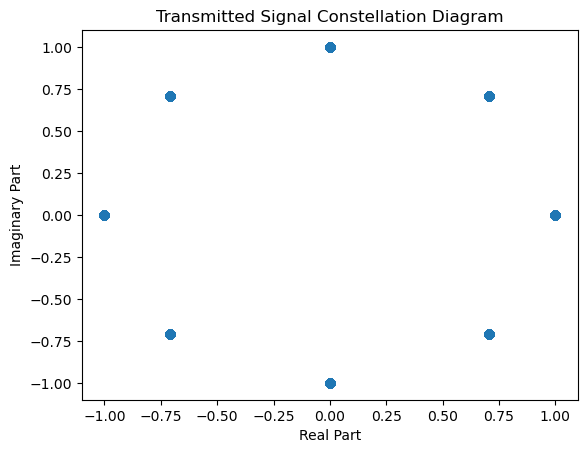

In [3]:

#convert the array numbers(0-255) into 8 bits, Total array size=65884*8=524288
binary_image = ''.join(np.array([(np.binary_repr(i,width=9)) for i in img]).reshape(-1))

#Map the MPSK bits to symbols
M=8
m=int(math.log2(M))
bits=[(2*np.pi*int(binary_image[j:j+m],2))/M for j in range(0,len(binary_image),m)]
transmitted_image=np.array([(math.cos(a))+1J*(math.sin(a)) for a in bits])

# plot the constellation 

plt.scatter(transmitted_image.real, transmitted_image.imag)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Transmitted Signal Constellation Diagram')
plt.show()

#Generate AWGN noise and add with transmitted_signal
SER_sim=list()
BER_sim=list()
l=2

for s in range(-10,11,1):
#     fig, ax = plt.subplots(1, 2, figsize=(15,40))
    snr_db = s #s

    # Calculate the SNR in linear scale
    snr = 10 ** (snr_db / 10)

    # Generate complex Gaussian noise with zero mean and unit variance
    noise = np.random.normal(loc=0, scale=np.sqrt(snr/2),size=(len(transmitted_image))) +1j * np.random.normal(loc=0,scale=np.sqrt(snr/2), size=(len(transmitted_image)))

    # Scale the noise to match the required SNR
    noise_power = np.var(noise)
    signal_power = 1
    scale_factor = np.sqrt(signal_power / (snr * noise_power))
    noise = noise * scale_factor



#     snr = 10**(snr_db/10) #snr in linear scale
#     noise = np.random.normal(0, np.sqrt(1/(snr*2)), len(transmitted_image)) + 1j*np.random.normal(0,np.sqrt(1/(snr*2)), len(transmitted_image))

#     # Add the noise to the symbols to create the received signal
    received_signal = transmitted_image + noise
    

    #Decode the recieved signal
    symbol_matrix=np.array([(math.cos(2*np.pi*i/M))+1J*(math.sin(2*np.pi*i/M)) for i in range(M)])
    bit_matrix=np.array([np.binary_repr(i,m) for i in range(M)])

    #convert to binary symbols
    ml_decoded=np.array([symbol_matrix[np.abs(symbol_matrix -i).argmin()] for i in received_signal])

    #convert to 8 bit code
    recieved_bits=''.join([bit_matrix[np.abs(symbol_matrix -i).argmin()] for i in received_signal])

    #convert the 8 bit code to integer 

    recieved_image=np.array([int(recieved_bits[i:i+9],2) for i in range(0,len(recieved_bits),9)])
    

    #Calculate the BER uisng simulation
    symbol_error=0
    bit_error=0
    for i in range(len(ml_decoded)):
        if ml_decoded[i]!=transmitted_image[i]:
            symbol_error+=1
    for i in range(len(binary_image)):        
        if binary_image[i]!=recieved_bits[i]:
            bit_error+=1   
    SER_sim+=[symbol_error/len(ml_decoded)]
    BER_sim+=[bit_error/len(recieved_bits)]



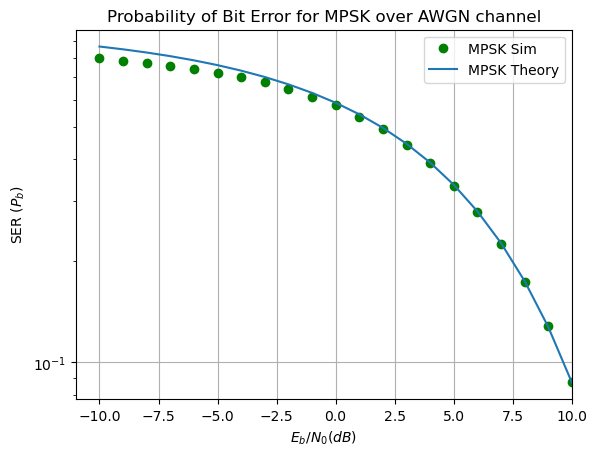

In [11]:
#Calculating the BER theoritically 

snr_db=np.arange(-10,11,1)
SER_theory =(1)*erfc(np.sqrt((10**(snr_db/10)))*math.sin(np.pi/M))

#Plot the BER vs SNR Curve
fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(snr_db,SER_sim,color='g',marker='o',linestyle='',label='MPSK Sim')
ax.semilogy(snr_db,SER_theory,marker='',linestyle='-',label='MPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$')
ax.set_ylabel('SER ($P_b$)')
ax.set_title('Probability of Bit Error for MPSK over AWGN channel')
ax.legend()
ax.set_xlim(-11,10)
ax.grid(True)
plt.show()

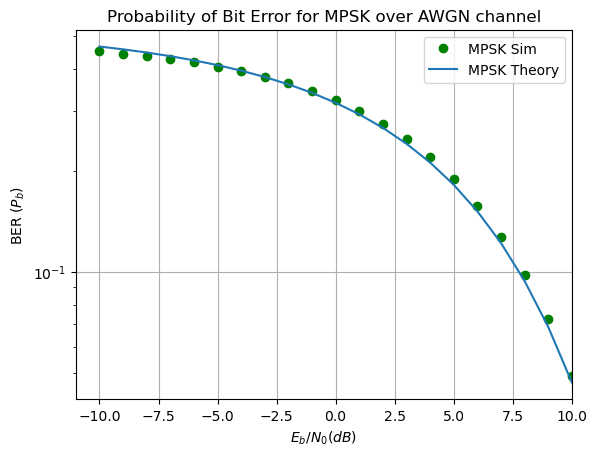

[0.4520704481336806, 0.4440358479817708, 0.4367268880208333, 0.4275478786892361, 0.4190995958116319, 0.4063483344184028, 0.39501953125, 0.3801083034939236, 0.3627098931206597, 0.3439246283637153, 0.3248257107204861, 0.2998504638671875, 0.2756466335720486, 0.2482723659939236, 0.21901448567708334, 0.18850877549913195, 0.15733506944444445, 0.1269344753689236, 0.09804789225260417, 0.07263353135850695, 0.049092610677083336] [0.7968902587890625, 0.7836507161458334, 0.7717742919921875, 0.7564442952473959, 0.742523193359375, 0.7226155598958334, 0.7014973958333334, 0.6761525472005209, 0.64697265625, 0.6136118570963541, 0.5788930257161459, 0.5345001220703125, 0.4919891357421875, 0.4414164225260417, 0.389312744140625, 0.3338572184244792, 0.2792409261067708, 0.22481791178385416, 0.17321268717447916, 0.12784830729166666, 0.08707173665364583]


In [9]:
#Calculating the BER theoritically 

snr_db=np.arange(-10,11,1)

BER_theory = 0.54*erfc(np.sqrt((10**(snr_db/10)))*math.sin(np.pi/M))


#Plot the BER vs SNR Curve
fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(snr_db,BER_sim,color='g',marker='o',linestyle='',label='MPSK Sim')
# ax.semilogy(snr_db,BER_sim,color='g',marker='o',linestyle='',label='MPSK Sim')
ax.semilogy(snr_db,BER_theory,marker='',linestyle='-',label='MPSK Theory')
ax.set_xlabel('$E_b/N_0(dB)$')
ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for MPSK over AWGN channel')
ax.legend()
ax.set_xlim(-11,10)
ax.grid(True)
plt.show()

print(BER_sim,SER_sim)